In [112]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv("./Biryani_Price_Prediction_Numerical_Features_Data.csv")
df.head(10)

,Chicken_Price,Rice_Price,Spice_Price,Vegetable_Price,Chef_Experience,Biryani_Price
0,122.159655,50.926428,23.162055,39.741046,14,155.47
1,54.809464,69.086702,47.263580,48.210956,4,133.60
2,128.151448,70.747459,39.408506,64.656744,16,166.36
3,132.794089,84.501217,21.255638,72.309967,20,173.97
4,125.050192,81.930751,20.105964,46.019320,14,161.44
5,129.953713,64.153003,10.203286,22.619699,15,158.43
6,132.513268,53.081386,37.828572,29.700353,3,143.92
7,68.640499,78.703250,11.951343,21.251668,8,138.01
8,73.569175,65.302236,31.304101,59.195781,16,151.50
9,113.375856,47.936573,48.484879,39.938878,10,150.38


In [114]:
df.describe()

,Chicken_Price,Rice_Price,Spice_Price,Vegetable_Price,Chef_Experience,Biryani_Price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,102.644877,70.449148,30.656470,49.789302,9.840000,150.144050
std,27.110935,17.527584,12.163921,16.139537,5.625177,10.986701
min,51.220307,40.014251,10.041179,20.541824,1.000000,127.500000
25%,81.146594,56.143481,19.187862,37.248670,5.000000,141.830000
50%,103.982085,71.005249,31.935607,50.523803,10.000000,149.725000
75%,126.682888,84.626845,41.108369,61.191666,15.000000,158.755000
max,149.769262,99.961210,49.659013,79.600216,20.000000,177.420000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Chicken_Price    200 non-null    float64
 1   Rice_Price       200 non-null    float64
 2   Spice_Price      200 non-null    float64
 3   Vegetable_Price  200 non-null    float64
 4   Chef_Experience  200 non-null    int64  
 5   Biryani_Price    200 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


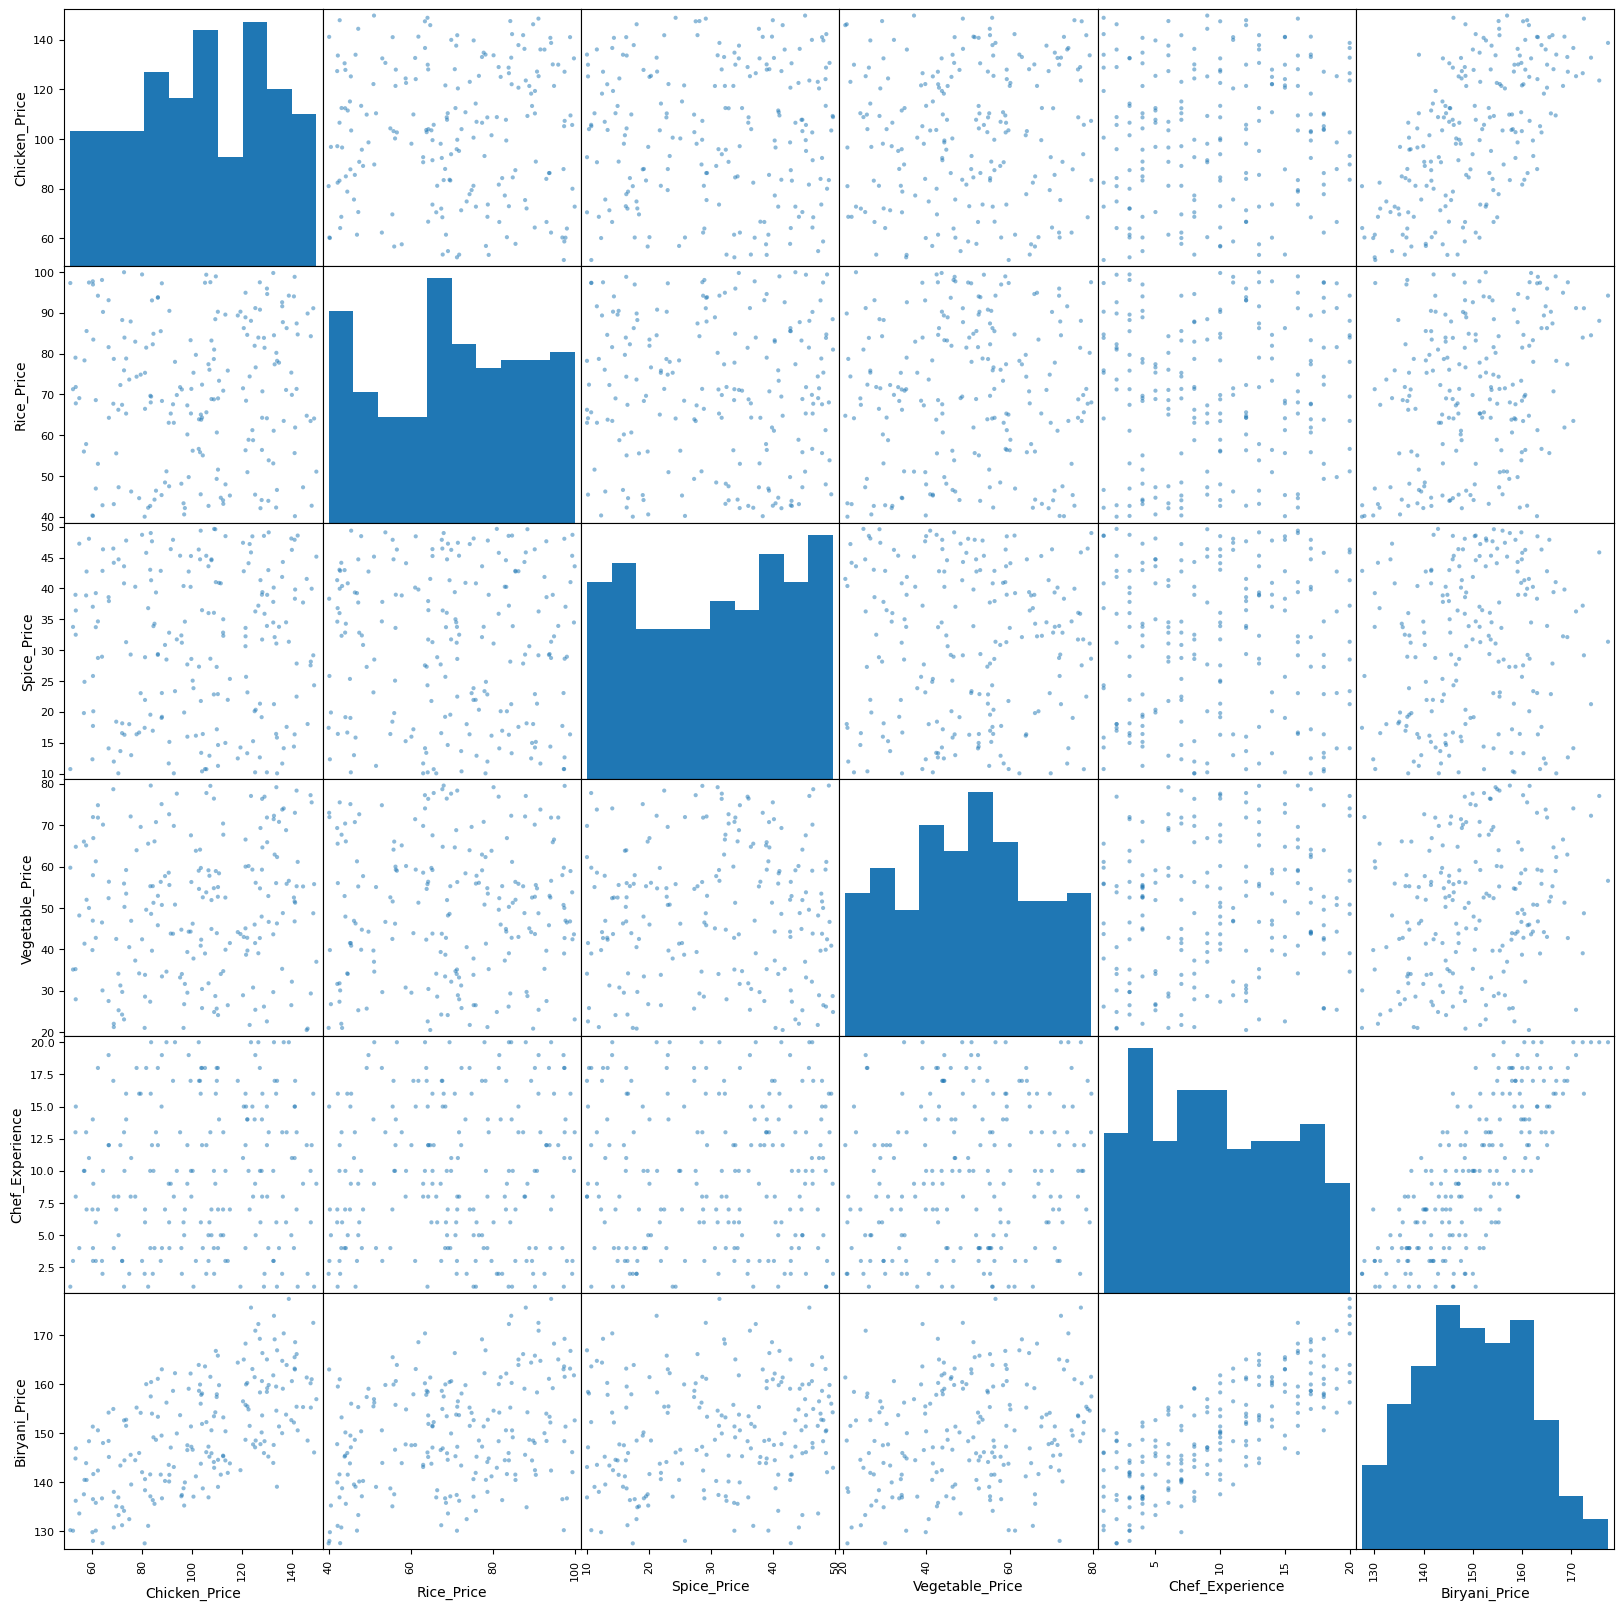

In [116]:
pd.plotting.scatter_matrix(df, figsize=(20, 20), alpha=0.5) #Cgecking correlation using graphs
plt.show()

In [117]:
df.corr() #checking correlations using raw numbers

,Chicken_Price,Rice_Price,Spice_Price,Vegetable_Price,Chef_Experience,Biryani_Price
Chicken_Price,1.000000,0.017545,0.022593,0.079867,0.089846,0.615256
Rice_Price,0.017545,1.000000,-0.045604,0.030135,0.071534,0.317593
Spice_Price,0.022593,-0.045604,1.000000,0.004928,0.017229,0.131558
Vegetable_Price,0.079867,0.030135,0.004928,1.000000,0.149283,0.235785
Chef_Experience,0.089846,0.071534,0.017229,0.149283,1.000000,0.783501
Biryani_Price,0.615256,0.317593,0.131558,0.235785,0.783501,1.000000


In [169]:
x = df[["Chicken_Price", "Chef_Experience"]] #setting up data
y = df[["Biryani_Price"]]

scaler = skl.preprocessing.MinMaxScaler().set_output(transform="pandas") #Scaling to have same size
x_scaled = scaler.fit_transform(x)

In [170]:
x_train, x_test, y_train, y_test = skl.model_selection.train_test_split(x_scaled, y, test_size=0.25, random_state=42) #spliting data

In [174]:
model = skl.linear_model.LinearRegression() #select model
model.fit(pd.DataFrame(x_train, columns=x.columns), pd.DataFrame(y_train, columns=y.columns)) 
y_preds = model.predict(pd.DataFrame(x_train, columns=x.columns))

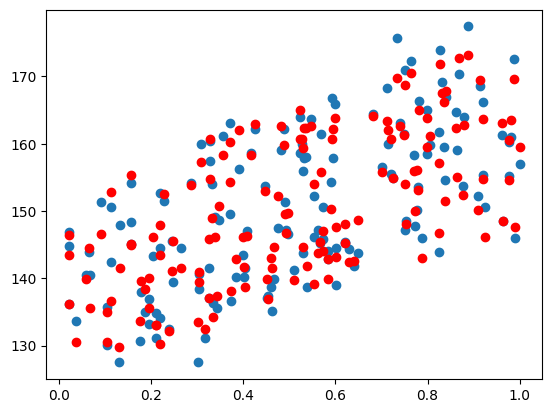

In [180]:
plt.scatter(x_train["Chicken_Price"], y_train)
plt.scatter(x_train["Chicken_Price"], y_preds, c="red")